In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [ ]:
"""
1. 데이터 불러오기(v3)
2. 피처 선택하기
3. train, test 나누기
4. 원핫 인코딩
6. 베이스라인 모델 만들기 (트리 모델), 점수 설정
7. boost 모델 적용해보기
8. 파라미터 조절
9. 예측기 완성
"""

In [3]:
path = "/Users/younghyunkim/Desktop/dataproject/my_closet/raw_data"

In [4]:
df = pd.read_csv(f"{path}/closet_data_v3.csv")
df.head()

,제품명,계절,구매 년도,카테고리,구매처,브랜드 여부,구매 전 착용 여부,색상,가격,유행 여부,구매 목적,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,성공점수,색상그룹,가격_bin,가격_q_bin,성공여부
0,배색 가디건 네이비,봄가을,2021,상의,1,0,1,네이비,3,0,일상,1,5,5,3,4.333333,블루 계열,1-4,매우 낮은 가격,1
1,배색 가디건 하늘,봄가을,2021,상의,0,0,1,스카이블루,3,0,일상,1,3,4,4,3.666667,블루 계열,1-4,매우 낮은 가격,1
2,줄무늬 티셔츠,봄가을,2014,상의,0,0,0,네이비,1,0,일상,1,4,5,4,4.333333,블루 계열,1-4,매우 낮은 가격,1
3,파란색 크롭 셔츠,봄가을,2023,상의,1,1,0,스카이블루,4,1,일상,1,4,4,4,4.000000,블루 계열,1-4,낮은 가격,1
4,숏 트렌치 코트,봄가을,2023,겉옷,0,1,1,베이지,16,1,일상,1,3,4,3,3.333333,브라운 계열,12-16,높은 가격,1


In [5]:
df.shape

(150, 20)

In [11]:
df['성공여부'].value_counts() / df.shape[0]
# 현재 성공 여부를 모두 1로 예측한다면 정확성은 0.53

1    0.533333
0    0.466667
Name: 성공여부, dtype: float64

In [16]:
df.columns

Index(['제품명', '계절', '구매 년도', '카테고리', '구매처', '브랜드 여부', '구매 전 착용 여부', '색상', '가격',
       '유행 여부', '구매 목적', '최근 1년 내 착용 여부', '착용 빈도', '만족도', '주변 평가', '성공점수',
       '색상그룹', '가격_bin', '가격_q_bin', '성공여부'],
      dtype='object')

In [22]:
feature_li = ['카테고리', '구매처', '브랜드 여부', '구매 전 착용 여부', '가격',
              '유행 여부', '구매 목적', '최근 1년 내 착용 여부', '색상그룹', '성공여부']

In [24]:
df = df[feature_li]
df.shape

(150, 10)

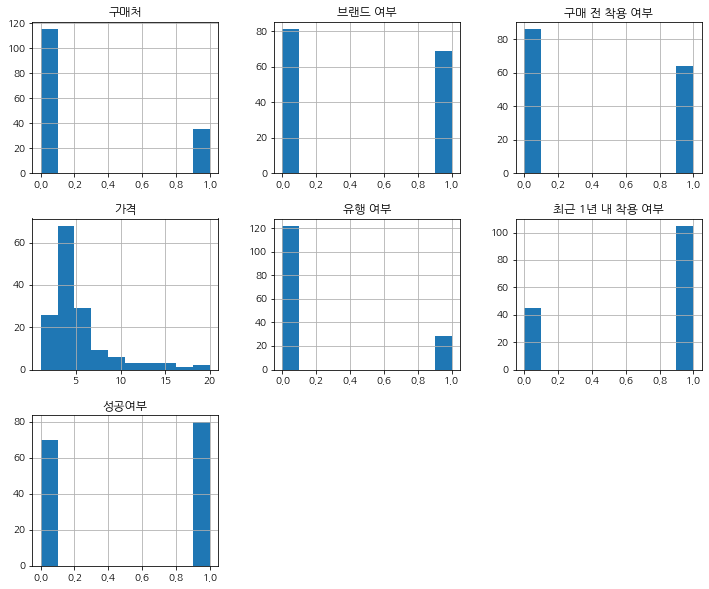

In [27]:
df.hist(bins=10, figsize=(12,10));

In [31]:
# train, test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state=42)

train.shape, test.shape,

((120, 10), (30, 10))

In [32]:
label_name = "성공여부"
feature_names = ['카테고리', '구매처', '브랜드 여부', '구매 전 착용 여부', '가격',
              '유행 여부', '구매 목적', '최근 1년 내 착용 여부', '색상그룹']
train[feature_names].head(2)

,카테고리,구매처,브랜드 여부,구매 전 착용 여부,가격,유행 여부,구매 목적,최근 1년 내 착용 여부,색상그룹
22,원피스,0,0,1,4,0,행사,1,블루 계열
15,하의,0,0,1,3,0,출근,1,블랙 계열


In [34]:
X_train = pd.get_dummies(train[feature_names])
print(X_train.shape)
display(X_train.head(2))

X_test = pd.get_dummies(test[feature_names])
print(X_test.shape)
display(X_test.head(2))

y_train= train[label_name]
print(y_train.shape)
y_train.head(2)

y_test = test[label_name]
print(y_test.shape)
y_test.head(2)

(120, 20)


,구매처,브랜드 여부,구매 전 착용 여부,가격,유행 여부,최근 1년 내 착용 여부,카테고리_겉옷,카테고리_상의,카테고리_원피스,카테고리_하의,구매 목적_일상,구매 목적_출근,구매 목적_행사,색상그룹_그레이 계열,색상그룹_그린 계열,색상그룹_브라운 계열,색상그룹_블랙 계열,색상그룹_블루 계열,색상그룹_핑크 계열,색상그룹_화이트 계열
22,0,0,1,4,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
15,0,0,1,3,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0


(30, 20)


,구매처,브랜드 여부,구매 전 착용 여부,가격,유행 여부,최근 1년 내 착용 여부,카테고리_겉옷,카테고리_상의,카테고리_원피스,카테고리_하의,구매 목적_일상,구매 목적_출근,구매 목적_행사,색상그룹_그레이 계열,색상그룹_그린 계열,색상그룹_브라운 계열,색상그룹_블랙 계열,색상그룹_블루 계열,색상그룹_핑크 계열,색상그룹_화이트 계열
73,1,0,0,3,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
18,0,1,1,5,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0


(120,)
(30,)


73    0
18    1
Name: 성공여부, dtype: int64

In [35]:
set(X_test.columns) == set(X_train.columns)

True

결정 트리 모델

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

In [117]:
model_tree = DecisionTreeClassifier(random_state=42, max_depth=7, min_samples_leaf=7)
model_tree.fit(X_train, y_train)
y_predict = model_tree.predict(X_test)
accuracy_score(y_test, y_predict)

0.7333333333333333

랜덤포레스트 모델

In [119]:
model_rf = RandomForestClassifier(random_state = 42, min_samples_leaf=4, max_depth=8, n_estimators=100)
model_rf.fit(X_train, y_train)
y_predict = model_rf.predict(X_test)
accuracy_score(y_test, y_predict)

0.8333333333333334

GBT 모델

In [132]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbt = GradientBoostingClassifier(random_state = 42, n_estimators=200, max_depth=9, learning_rate=0.95)

model_gbt.fit(X_train, y_train)
y_predict = model_gbt.predict(X_test)
accuracy_score(y_test, y_predict)

0.6333333333333333

CatBoost

In [136]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(random_state = 42, silent=True)
cb.fit(X_train, y_train)
y_predict = model_gbt.predict(X_test)
accuracy_score(y_test, y_predict)

0.6333333333333333

랜덤포레스트 파라미터 조절 (예정)

In [141]:
model_rf2 = RandomForestClassifier(random_state = 42, min_samples_leaf=5, max_depth=9, n_estimators=100)
model_rf2.fit(X_train, y_train)
y_predict = model_rf.predict(X_test)
accuracy_score(y_test, y_predict)

0.8333333333333334

In [142]:
fi =pd.Series(model_rf2.feature_importances_)
fi.index = model_rf2.feature_names_in_
fi.nlargest(20)

최근 1년 내 착용 여부    0.391344
구매 목적_일상         0.119697
가격               0.075692
구매 목적_행사         0.052400
카테고리_상의          0.052297
색상그룹_블랙 계열       0.042206
구매 목적_출근         0.041373
브랜드 여부           0.030859
구매 전 착용 여부       0.030811
색상그룹_블루 계열       0.027345
카테고리_겉옷          0.025236
색상그룹_화이트 계열      0.024114
구매처              0.019537
카테고리_원피스         0.018264
유행 여부            0.016234
색상그룹_브라운 계열      0.016086
카테고리_하의          0.007858
색상그룹_그레이 계열      0.004213
색상그룹_핑크 계열       0.002489
색상그룹_그린 계열       0.001942
dtype: float64

<AxesSubplot:>

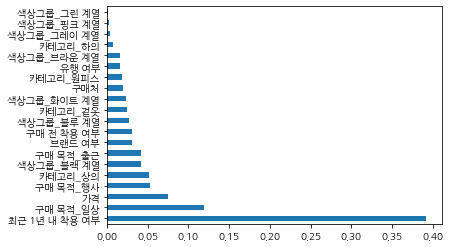

In [150]:
fi.nlargest(20).plot.barh()